In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import pickle
import re
import json

In [123]:
df = pd.read_json('./output.json')
df


,car_name,car_model,car_price,لون السيارة,نوع الوقود,أصل السيارة,رخصة السيارة,نوع الجير,الزجاج,قوة الماتور,عداد السيارة,عدد الركاب,وسيلة الدفع,معروضة,أصحاب سابقون,إضافات,الدفع
0,كيا اوبتيما,موديل سنة 2014,100000,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000,4+1,نقدا فقط,للبيع فقط,يد اولى,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nفتحة...,NaN
1,كيا سورينتو,موديل سنة 2007,60000,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000,7+1,إمكانية التقسيط,للبيع أو التبديل,2,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nفتحة...,NaN
2,هونداي افانتي,موديل سنة 2006,43500,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,None,None,نقدا فقط,للبيع فقط,None,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nجنطا...,NaN
3,فيات 127,موديل سنة 1982,5500,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906,شغال,4+1,إمكانية التقسيط,للبيع فقط,00,مُكيّف\nمسجل CD,NaN
4,بيجو 208,موديل سنة 2014,54000,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000,4+1,نقدا فقط,للبيع فقط,None,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nجنطات مغنيسيو...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859,كيا مورننغ,موديل سنة 2015,45000,فيراني,كهرباء,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1000,130000,4+1,إمكانية التقسيط,للبيع فقط,2,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nجنطات مغنيسيو...,NaN
6860,فورد ترانزيت,موديل سنة 2002,48000,أبيض,ديزل,عمومي,فلسطينية,عادي,الكتروني,2400,00000,7+1,نقدا فقط,للبيع فقط,5,NaN,دفع خلفي
6861,بيجو بارتنر,موديل سنة 2018,87000,فضي,ديزل,خصوصي,فلسطينية,عادي,الكتروني,1600,50000,4+1,نقدا فقط,للبيع فقط,يد صفر,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nوساد...,دفع أمامي
6862,كيا سورينتو,موديل سنة 2017,126000,بترولي,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,100,6+1,نقدا فقط,للبيع فقط,ثانيه,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nفتحة...,NaN


# Data visualization

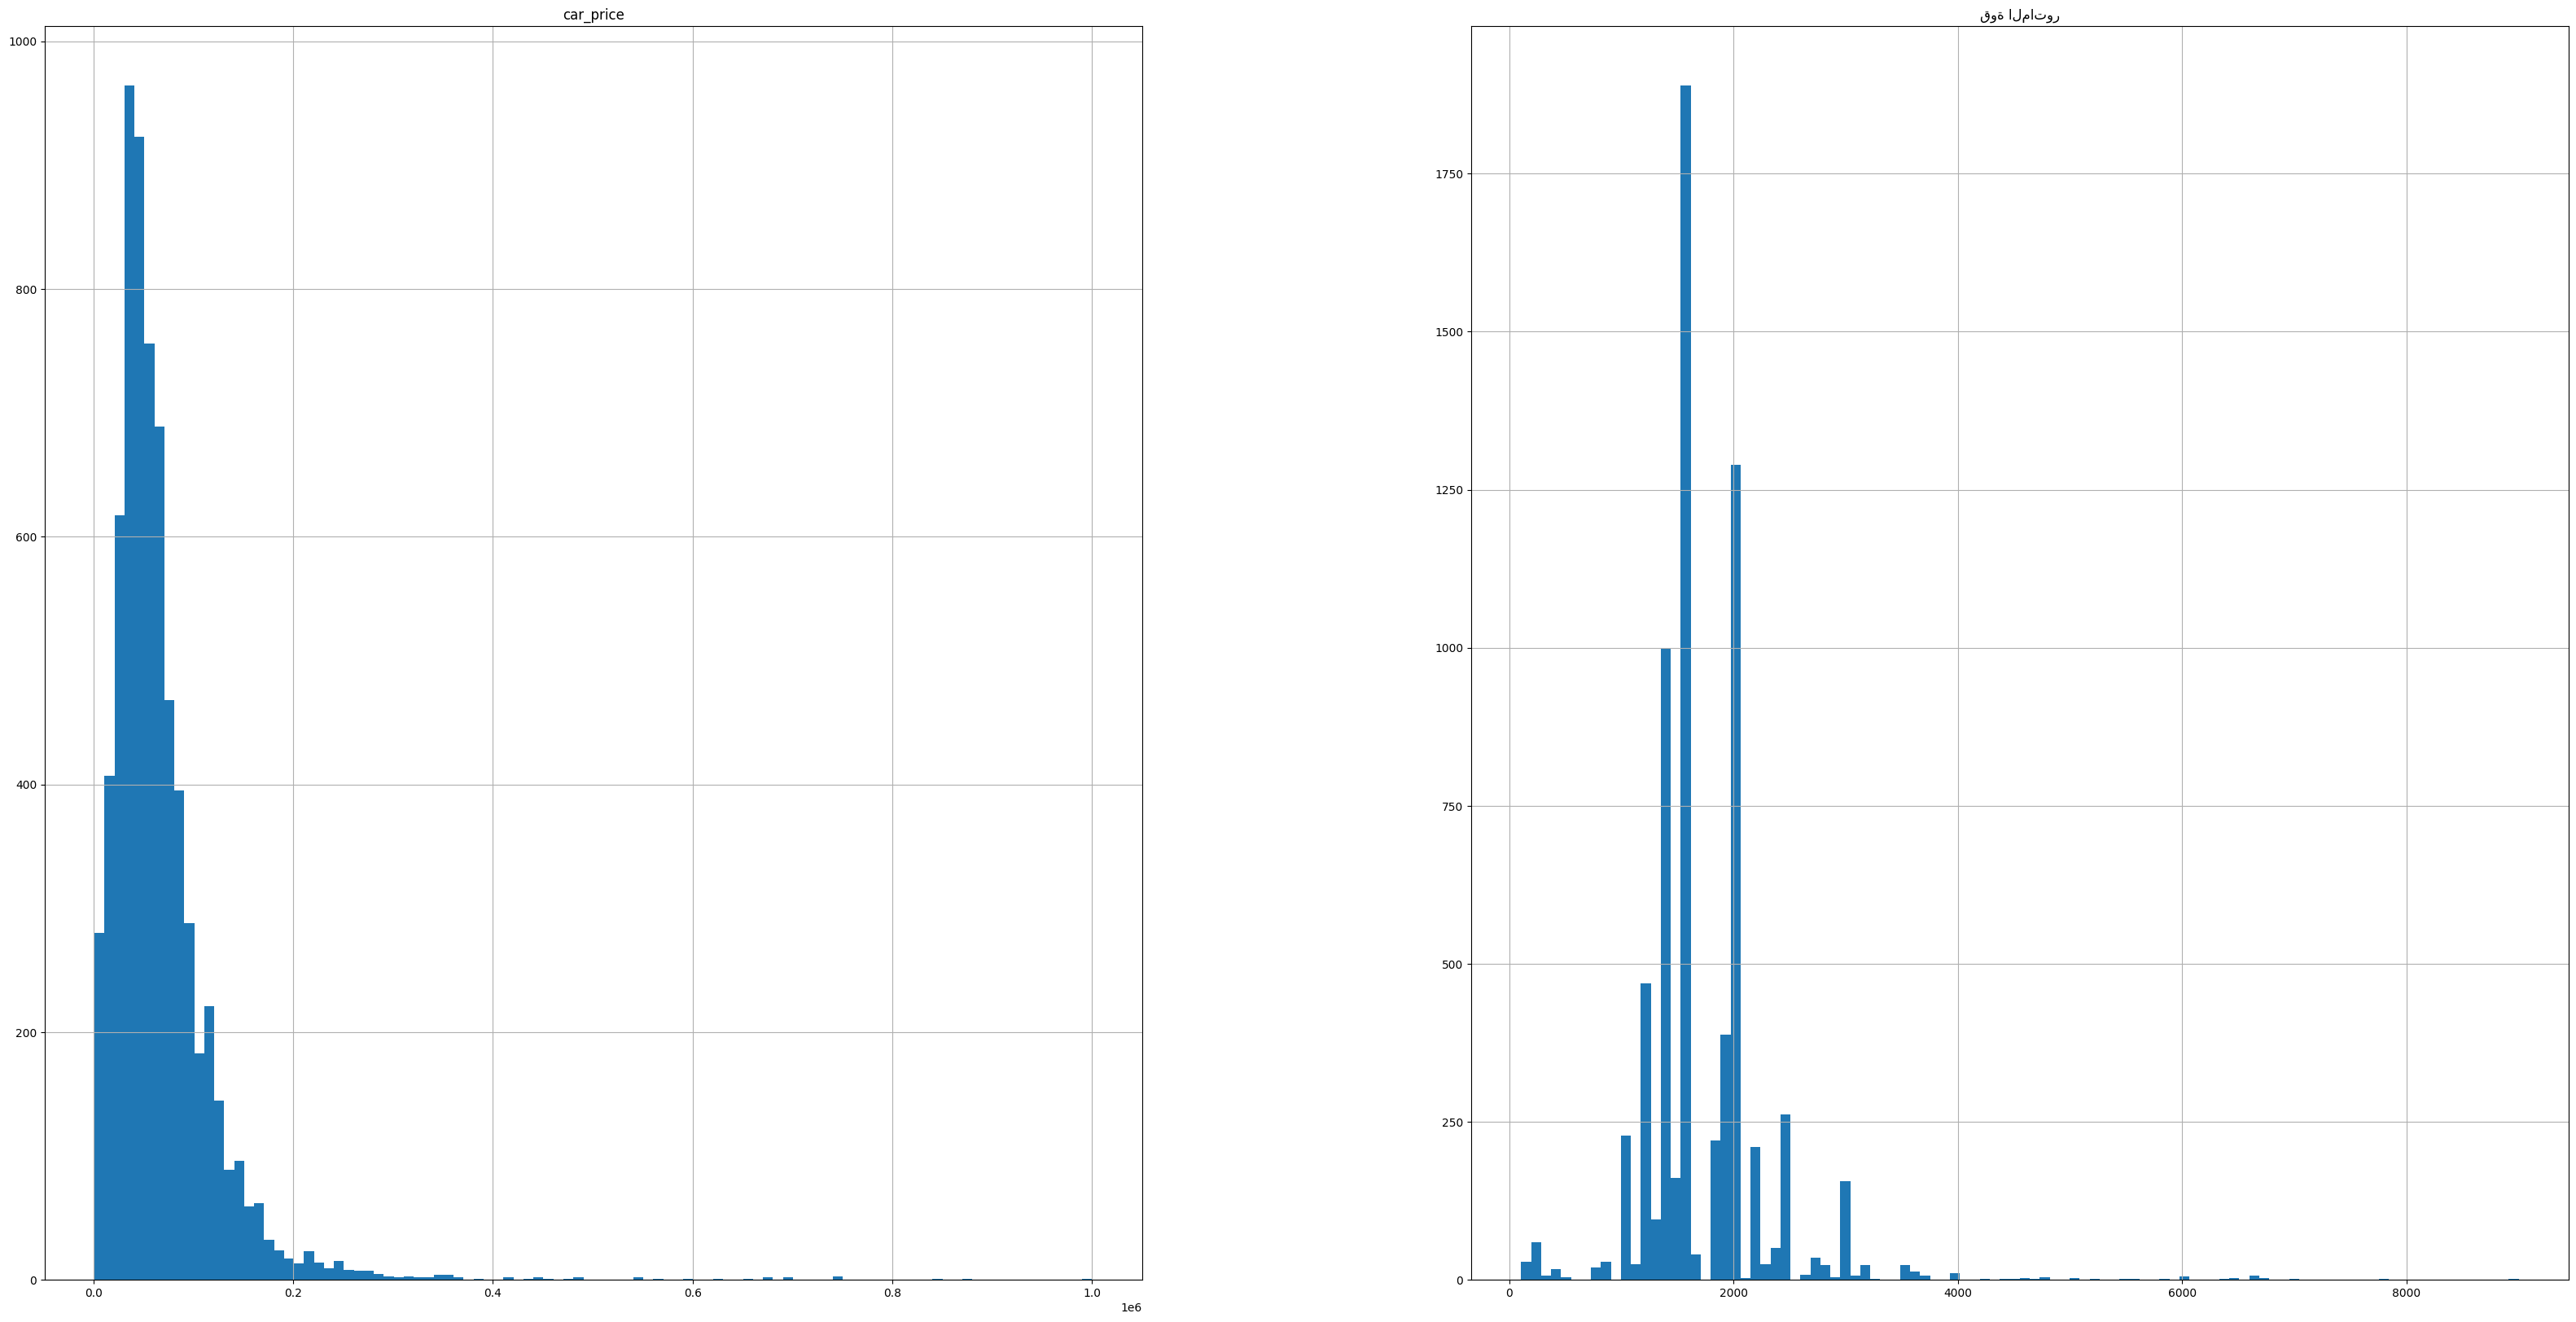

In [124]:
df.hist(bins=100,figsize=(40,20))
plt.show()

# remove "موديل سنة" that's clearly unnecessary & make data type int


In [125]:
def extract_year(value):
    return value.split()[-1]
df['car_model'] = df['car_model'].apply(extract_year)
df['car_model']=df['car_model'].astype(int)

# drop data that doesn't affect the price in real life

In [126]:
df=df.drop(columns=["معروضة"])
df=df.drop(columns=["الزجاج"])
df=df.drop(columns=["لون السيارة"])
df=df.drop(columns=["أصحاب سابقون"]) # drop cause it to hard to clean and we can depend on عداد السياره  insted of it 

# Data Analysis


display no of NaN value on each columns

In [127]:
df.isna().sum()

car_name           0
car_model          0
car_price          0
نوع الوقود         0
أصل السيارة        0
رخصة السيارة       0
نوع الجير          0
قوة الماتور        0
عداد السيارة    1941
عدد الركاب       777
وسيلة الدفع        0
إضافات           501
الدفع           5433
dtype: int64

Display percentage of NaN value on each columns

In [128]:
percent_missing = df.isna().sum()/ df.shape[0]*100
percent_missing

car_name         0.000000
car_model        0.000000
car_price        0.000000
نوع الوقود       0.000000
أصل السيارة      0.000000
رخصة السيارة     0.000000
نوع الجير        0.000000
قوة الماتور      0.000000
عداد السيارة    28.277972
عدد الركاب      11.319930
وسيلة الدفع      0.000000
إضافات           7.298951
الدفع           79.152098
dtype: float64

In [129]:
# drop high percentage data 
df=df.drop(columns=["الدفع"])


Display every possible values on each column

,وسيلة الدفع,count
0,إمكانية التقسيط,2541
1,نقدا فقط,4323


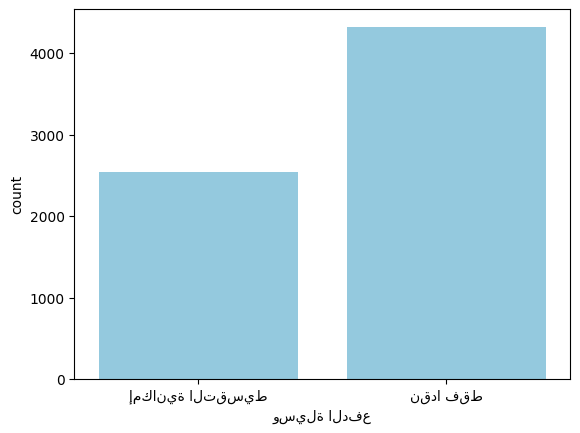

In [130]:
pay_method = df.groupby('وسيلة الدفع').size().reset_index(name='count')
sns.barplot(x="وسيلة الدفع", y='count', data=pay_method, color='skyblue')
pay_method

,نوع الوقود,count
0,بنزين,3970
1,ديزل,2870
2,كهرباء,1
3,هايبرد,23


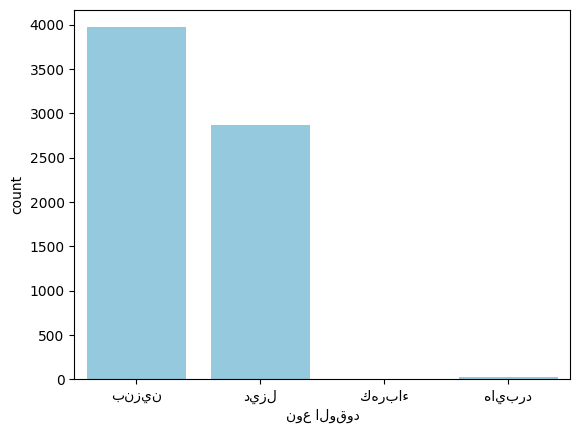

In [131]:
oil_type = df.groupby('نوع الوقود').size().reset_index(name='count')
sns.barplot(x='نوع الوقود', y='count', data=oil_type, color='skyblue')
oil_type

In [132]:
# drop rare values  
df = df[df['نوع الوقود'] != "كهرباء"]
df = df[df['نوع الوقود'] != "هايبرد"]


,أصل السيارة,count
0,تأجير,128
1,تجاري,189
2,تدريب سياقة,38
3,حكومي,96
4,خصوصي,5809
5,عمومي,580


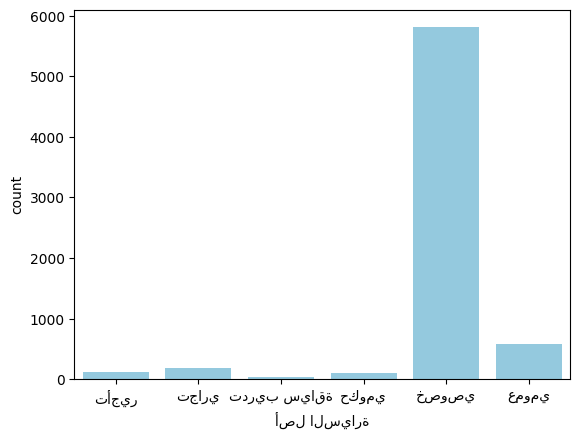

In [133]:
car_type = df.groupby('أصل السيارة').size().reset_index(name='count')
sns.barplot(x='أصل السيارة', y='count', data=car_type, color='skyblue')
car_type


In [134]:
#drop rare values
df = df[df['أصل السيارة'] != "تأجير"]
df = df[df['أصل السيارة'] != "تدريب سياقة"]
df = df[df['أصل السيارة'] != "حكومي"]

<Axes: xlabel='رخصة السيارة', ylabel='count'>

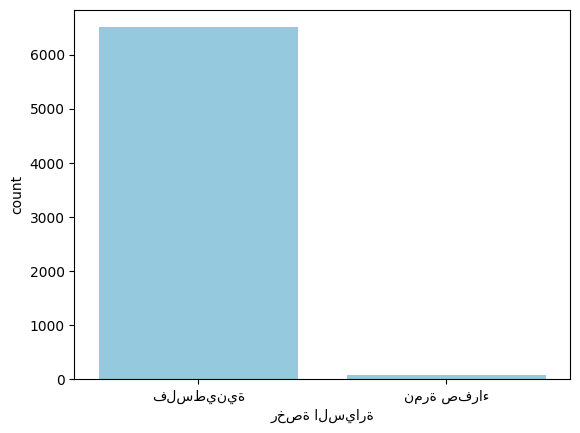

In [135]:
car_id_type = df.groupby('رخصة السيارة').size().reset_index(name='count')
car_id_type
sns.barplot(x='رخصة السيارة', y='count', data=car_id_type, color='skyblue')


In [136]:
df = df[df['رخصة السيارة'] != 'نمرة صفراء'] # drop rare values 
df=df.drop(columns=['رخصة السيارة']) # drop the column use all cars have the same values


<Axes: xlabel='نوع الجير', ylabel='count'>

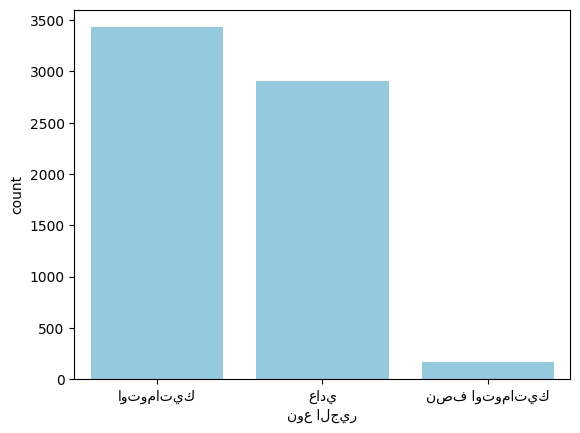

In [137]:
car_id_type = df.groupby('نوع الجير').size().reset_index(name='count')
car_id_type
sns.barplot(x='نوع الجير', y='count', data=car_id_type, color='skyblue')


In [138]:
#drop rare value
df = df[df["نوع الجير"] != "نصف اوتوماتيك"]


In [139]:
engine_power = df.groupby('قوة الماتور').size().reset_index(name='count')
engine_power

,قوة الماتور,count
0,106,1
1,120,2
2,125,14
3,140,1
4,150,1
...,...,...
131,6600,2
132,6700,3
133,7000,1
134,7777,1


In [140]:
# find mode for each car_name and replace the uniq value in this car_name with mode 
def optimize_power_data(group):
    mode_value = group["قوة الماتور"].mode().iloc[0] 
    value_counts = group["قوة الماتور"].value_counts()
    unique_values = value_counts[value_counts == 1].index.tolist() 
    for unique_value in unique_values:
        group["قوة الماتور"]= mode_value        
    return group
df = df.groupby('car_name', group_keys=False).apply(optimize_power_data)
df

,car_name,car_model,car_price,نوع الوقود,أصل السيارة,نوع الجير,قوة الماتور,عداد السيارة,عدد الركاب,وسيلة الدفع,إضافات
0,كيا اوبتيما,2014,100000,بنزين,خصوصي,اوتوماتيك,2000,75000,4+1,نقدا فقط,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nفتحة...
2,هونداي افانتي,2006,43500,بنزين,خصوصي,اوتوماتيك,1600,None,None,نقدا فقط,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nجنطا...
3,فيات 127,1982,5500,بنزين,خصوصي,عادي,900,شغال,4+1,إمكانية التقسيط,مُكيّف\nمسجل CD
4,بيجو 208,2014,54000,بنزين,خصوصي,اوتوماتيك,1200,38000,4+1,نقدا فقط,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nجنطات مغنيسيو...
5,بي ام دبليو x3,2015,205000,ديزل,خصوصي,اوتوماتيك,2000,None,5+1,نقدا فقط,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nفتحة...
...,...,...,...,...,...,...,...,...,...,...,...
6858,كيا سول,2012,50000,ديزل,خصوصي,اوتوماتيك,1600,None,4+1,نقدا فقط,مُكيّف\nإغلاق مركزي\nمسجل CD\nوسادة حماية هوائية
6860,فورد ترانزيت,2002,48000,ديزل,عمومي,عادي,2500,00000,7+1,نقدا فقط,NaN
6861,بيجو بارتنر,2018,87000,ديزل,خصوصي,عادي,1600,50000,4+1,نقدا فقط,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nوساد...
6862,كيا سورينتو,2017,126000,ديزل,خصوصي,اوتوماتيك,2200,100,6+1,نقدا فقط,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nفتحة...


In [141]:
value_counts = df["قوة الماتور"].value_counts()
unique_values = value_counts[value_counts == 1]
unique_values


قوة الماتور
1990    1
2005    1
150     1
290     1
6000    1
1690    1
1518    1
321     1
2390    1
1700    1
480     1
320     1
9000    1
1450    1
2150    1
170     1
5000    1
4700    1
1006    1
1928    1
2996    1
340     1
1234    1
249     1
Name: count, dtype: int64

In [142]:

for data in unique_values.index:
    if (data > 6000) or (data < 1400):
        df = df[df["قوة الماتور"] != data]


In [143]:
NOP = df.groupby('عدد الركاب').size().reset_index(name='count') # NOP = number of passengers  
NOP

,عدد الركاب,count
0,+1,1
1,000,1
2,1,6
3,1+1,37
4,1+2,2
5,1+7,4
6,1+٤,1
7,1٠4,1
8,2,1
9,2+1,95


In [144]:
# remove all non numeric symbols
def extract_and_sum(s):
    numbers = re.findall(r'\d+', str(s))
    return sum(map(int, numbers)) if numbers else None
df['عدد الركاب'] = df['عدد الركاب'].apply(extract_and_sum)


In [145]:
#check cars with NOP none
condition = df['عدد الركاب'].isna()
filtered_df = df[condition]
car_without_pass_data=filtered_df['car_name'].drop_duplicates()
car_without_pass_data

2             هونداي افانتي
8                فورد فيستا
14              سكودا فابيا
16              بيجو بارتنر
27           سكودا اوكتافيا
               ...         
6583            سكودا كاروك
6593       فولكسفاجن تيجوان
6657     فولكسفاجن جولف بلس
6736      تويوتا لاند كروزر
6789    ميتسوبيشي اوت لاندر
Name: car_name, Length: 200, dtype: object

In [146]:
#make none values and 0 pandas NaN
df['عدد الركاب'].replace('None', pd.NA, inplace=True)
df['عدد الركاب'].replace(0, pd.NA, inplace=True)
df['عدد الركاب'] = pd.to_numeric(df['عدد الركاب'], errors='coerce') # make data type numaric  


In [147]:

def replace_none_with_mode(group):# find mod for group data 
    mode_value = group['عدد الركاب'].mode().iloc[0] if not group['عدد الركاب'].mode().empty else pd.NA
    group['عدد الركاب'].fillna(mode_value, inplace=True)
    return group

df = df.groupby('car_name', group_keys=False).apply(replace_none_with_mode) # replace none value to mode for each car name 
df.dropna(subset=['عدد الركاب'], inplace=True) # drop rest of none case it have rare car_name and can not predict the value


In [148]:
# replace outliers with mode value for each car name
def replace_outliers(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    mode_value = group.mode().iloc[0]
    return group.apply(lambda x: mode_value if x < lower_bound or x > upper_bound else x)

df['عدد الركاب'] = df.groupby('car_name')['عدد الركاب'].transform(replace_outliers) 

<Axes: xlabel='عدد الركاب', ylabel='count'>

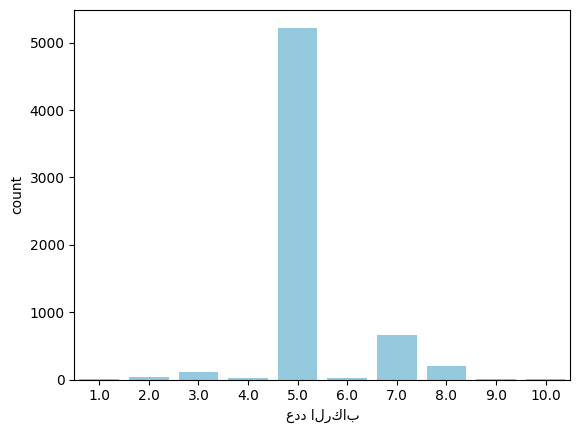

In [149]:
passengers_no = df.groupby('عدد الركاب').size().reset_index(name='count')
sns.barplot(x='عدد الركاب', y='count', data=passengers_no, color='skyblue')

In [150]:
kiloage = df.groupby("عداد السيارة").size().reset_index(name='count')
kiloage

,عداد السيارة,count
0,!!!!,1
1,******,2
2,********,1
3,-,1
4,...,2
...,...,...
1152,٩٨٠٠٠,1
1153,٩٩٩٠٠٠,1
1154,٩٩٩٩٩٩,1
1155,٩٩٩٩٩٩٩٩٩٩,1


In [151]:
df["عداد السيارة"] = df["عداد السيارة"].str.replace('\D', "", regex=True) # remove charcters 
df["عداد السيارة"] = df["عداد السيارة"].replace("None", pd.NA) # replace python none value  to pandas missing value 
df["عداد السيارة"] = df["عداد السيارة"].replace("", pd.NA) # replace python none value  to pandas missing value 

df.dropna(subset=["عداد السيارة"], inplace=True) # drop all missing data 
df["عداد السيارة"] = df["عداد السيارة"].astype("float64") # make data type float
df["عداد السيارة"] = df["عداد السيارة"].apply(lambda x: x * 1000 if pd.notna(x) and x < 1000 else x) # multiple all values under 1000 with 1000 ** cuse its commone to say عداد السيارة" = 50 and mean 50000**

condition = ((df["عداد السيارة"] < 10000) | (df["عداد السيارة"] > 1000000))
df.drop(df[condition].index, inplace=True) # drop all data under 10000 and above 10000000 cuse most of them not real

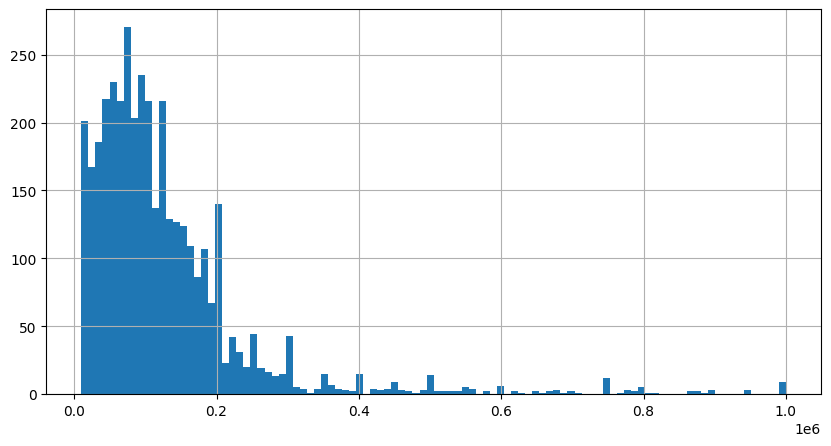

In [152]:
df["عداد السيارة"].hist(bins=100,figsize=(10,5))
plt.show()

In [153]:
def detect_outliers(group, column):
    q1 = group[column].quantile(0.25)
    q3 = group[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = group[(group[column] < lower_bound) | (group[column] > upper_bound)]
    return outliers

def process_outliers(group, column):
    outliers = detect_outliers(group, column)
    
    # Drop rows with outliers
    group = group.drop(outliers.index, axis=0)
    
    return group

def replace_to_none(group):
    group = process_outliers(group,"عداد السيارة")
    return group

df = df.groupby('car_name', group_keys=False).apply(replace_to_none)
df["عداد السيارة"].describe()

count       3649.000000
mean      112786.770622
std        88432.363803
min        10000.000000
25%        55000.000000
50%        95000.000000
75%       150000.000000
max      1000000.000000
Name: عداد السيارة, dtype: float64

In [155]:
# replace uniqu values with mode
def optimize_power_data(group):
    mode_value = group["قوة الماتور"].mode().iloc[0] 
    value_counts = group["قوة الماتور"].value_counts()
    unique_values = value_counts[value_counts == 1].index.tolist()
    for unique_value in unique_values:
        group["قوة الماتور"]= mode_value        
    return group
df = df.groupby('car_name', group_keys=False).apply(optimize_power_data)
df

,car_name,car_model,car_price,نوع الوقود,أصل السيارة,نوع الجير,قوة الماتور,عداد السيارة,عدد الركاب,وسيلة الدفع,إضافات
4692,Dodge رام,2015,125000,ديزل,تجاري,اوتوماتيك,6700,230000.0,7.0,نقدا فقط,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nجنطا...
6443,Dodge رام,2015,125000,ديزل,خصوصي,اوتوماتيك,6700,120000.0,5.0,إمكانية التقسيط,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nجنطا...
1495,أفيكو 150E25,2008,125000,ديزل,خصوصي,عادي,4000,200000.0,3.0,نقدا فقط,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nوساد...
5945,أفيكو 2000,2000,45000,ديزل,خصوصي,عادي,1518,11000.0,3.0,إمكانية التقسيط,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nفتحة...
1861,أفيكو 2007,2007,50000,ديزل,تجاري,عادي,3000,280000.0,3.0,إمكانية التقسيط,مُكيّف\nمسجل CD
...,...,...,...,...,...,...,...,...,...,...,...
6506,هونداي كونا,2020,115000,بنزين,خصوصي,اوتوماتيك,1600,30000.0,5.0,نقدا فقط,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nفتحة...
6571,هونداي كونا,2019,105000,بنزين,خصوصي,اوتوماتيك,1600,39000.0,5.0,نقدا فقط,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nجنطا...
6586,هونداي كونا,2019,108000,بنزين,خصوصي,اوتوماتيك,1600,45000.0,5.0,نقدا فقط,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nجنطا...
1829,هونداي ٢٠٠٦,2006,40000,بنزين,خصوصي,اوتوماتيك,1600,40000.0,5.0,نقدا فقط,مُكيّف\nجهاز إنذار\nمسجل CD\nجنطات مغنيسيوم


In [156]:
# find unique values that didnt replaced
value_counts = df["قوة الماتور"].value_counts()
unique_values = value_counts[value_counts == 1]
unique_values


قوة الماتور
2600    1
4500    1
1518    1
2996    1
270     1
460     1
5000    1
1700    1
200     1
4800    1
1995    1
Name: count, dtype: int64

In [157]:
#after manual checking data i found that i can use only the data between 1400 and 6000 from uniqe"قوة الماتور" data
for data in unique_values.index:
    if (data > 6000) or (data < 1400):
        df = df[df["قوة الماتور"] != data]

value_counts = df["قوة الماتور"].value_counts()

unique_values = value_counts[value_counts == 1]

In [158]:
df['car_price'].describe()

count      3646.000000
mean      76883.130828
std       54661.788313
min        1200.000000
25%       45000.000000
50%       65000.000000
75%       95000.000000
max      750000.000000
Name: car_price, dtype: float64

In [159]:
def detect_outliers(group, column):
    q1 = group[column].quantile(0.25)
    q3 = group[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = group[(group[column] < lower_bound) | (group[column] > upper_bound)]
    return outliers

def process_outliers(group, column):
    outliers = detect_outliers(group, column)
    
    # Drop rows with outliers
    group = group.drop(outliers.index, axis=0)
    
    return group

def process_outlier(column):
    z_scores = stats.zscore(df[column])
    abs_z_scores = abs(z_scores)
    outliers = (abs_z_scores > 3)
    df[column] = np.where(outliers, df[column].median(), df[column])

def replace_to_none(group):
    group = process_outliers(group, 'car_price')
    return group
process_outlier('car_price')
df = df.groupby('car_name', group_keys=False).apply(replace_to_none)


In [160]:
df['car_name'] = df['car_name'].replace({'IVIECO': 'أفيكو', 'BMW': 'بي ام دبليو'}, regex=True)


In [161]:
company_names  = pd.read_json('./Brands.json') # this file contain all companies i find on data 


In [162]:
# add array for each brand contain every model it have
company_names['car_model'] = [[] for _ in range(len(company_names))]  
for index, row in df.iterrows():
    name = row["car_name"]
    for i, company in enumerate(company_names["company_name"]):
        if company in name:
            df.at[index, 'Brands'] = company
            df.at[index, 'car_name'] = name.replace(company, '').strip()
            break
df = df[df["Brands"].notna()]

C:\Users\tareq\AppData\Local\Temp\ipykernel_2060\3492310719.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Dodge' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[index, 'Brands'] = company


In [163]:
#chick if the name = the year model drop it
def convert_arabic_to_western(num):
    arabic_numerals = '٠١٢٣٤٥٦٧٨٩'
    western_numerals = '0123456789'
    mapping = str.maketrans(arabic_numerals, western_numerals)
    return num.translate(mapping)

# Use .loc to apply the conversion without triggering the warning
df.loc[:, 'car_name'] = df['car_name'].apply(convert_arabic_to_western)

# Use .loc to filter rows based on the condition
df = df.loc[df['car_name'] != df['car_model']].copy()

df.reset_index(drop=True, inplace=True)


In [164]:
company_data = []

processed_companies = set()
for company in df['Brands'].unique():
    if company not in processed_companies:
        processed_companies.add(company)
        company_df = df[df['Brands'] == company]
        unique_models = company_df['car_name'].unique().tolist()
        company_data.append({'company_name': company, 'models': unique_models})

with open('car_brands.json', 'w', encoding='utf-8') as json_file:
    json.dump(company_data, json_file, ensure_ascii=False, indent=2)

# incoding non numaric values


In [165]:
df["إضافات"]=df["إضافات"].fillna("")
df['فتحة سقف'] = df['إضافات'].apply(lambda x: 1 if 'فتحة سقف' in x else 0)
df=df.drop(columns=["إضافات"])
df


,car_name,car_model,car_price,نوع الوقود,أصل السيارة,نوع الجير,قوة الماتور,عداد السيارة,عدد الركاب,وسيلة الدفع,Brands,فتحة سقف
0,رام,2015,125000.0,ديزل,تجاري,اوتوماتيك,6700,230000.0,7.0,نقدا فقط,Dodge,0
1,رام,2015,125000.0,ديزل,خصوصي,اوتوماتيك,6700,120000.0,5.0,إمكانية التقسيط,Dodge,0
2,150E25,2008,125000.0,ديزل,خصوصي,عادي,4000,200000.0,3.0,نقدا فقط,أفيكو,0
3,2000,2000,45000.0,ديزل,خصوصي,عادي,1518,11000.0,3.0,إمكانية التقسيط,أفيكو,1
4,2007,2007,50000.0,ديزل,تجاري,عادي,3000,280000.0,3.0,إمكانية التقسيط,أفيكو,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3498,كونا,2020,115000.0,بنزين,خصوصي,اوتوماتيك,1600,30000.0,5.0,نقدا فقط,هونداي,1
3499,كونا,2019,105000.0,بنزين,خصوصي,اوتوماتيك,1600,39000.0,5.0,نقدا فقط,هونداي,0
3500,كونا,2019,108000.0,بنزين,خصوصي,اوتوماتيك,1600,45000.0,5.0,نقدا فقط,هونداي,0
3501,2006,2006,40000.0,بنزين,خصوصي,اوتوماتيك,1600,40000.0,5.0,نقدا فقط,هونداي,0


In [166]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

columns_to_encode =[ "نوع الوقود","نوع الجير","أصل السيارة","وسيلة الدفع",]
for column in columns_to_encode:
    le = LabelEncoder()
    feature_arr = le.fit_transform(df[column])
    feature_arr = feature_arr.reshape(-1, 1)  # Reshape to a 2D array
    ohe = OneHotEncoder()
    feature_arr = ohe.fit_transform(feature_arr).toarray()
    feature_labels = [str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    # Concatenate the new one-hot encoded features to the original DataFrame
    df = pd.concat([df, features_df], axis=1)
    # Drop the original column
    df = df.drop(column, axis=1)


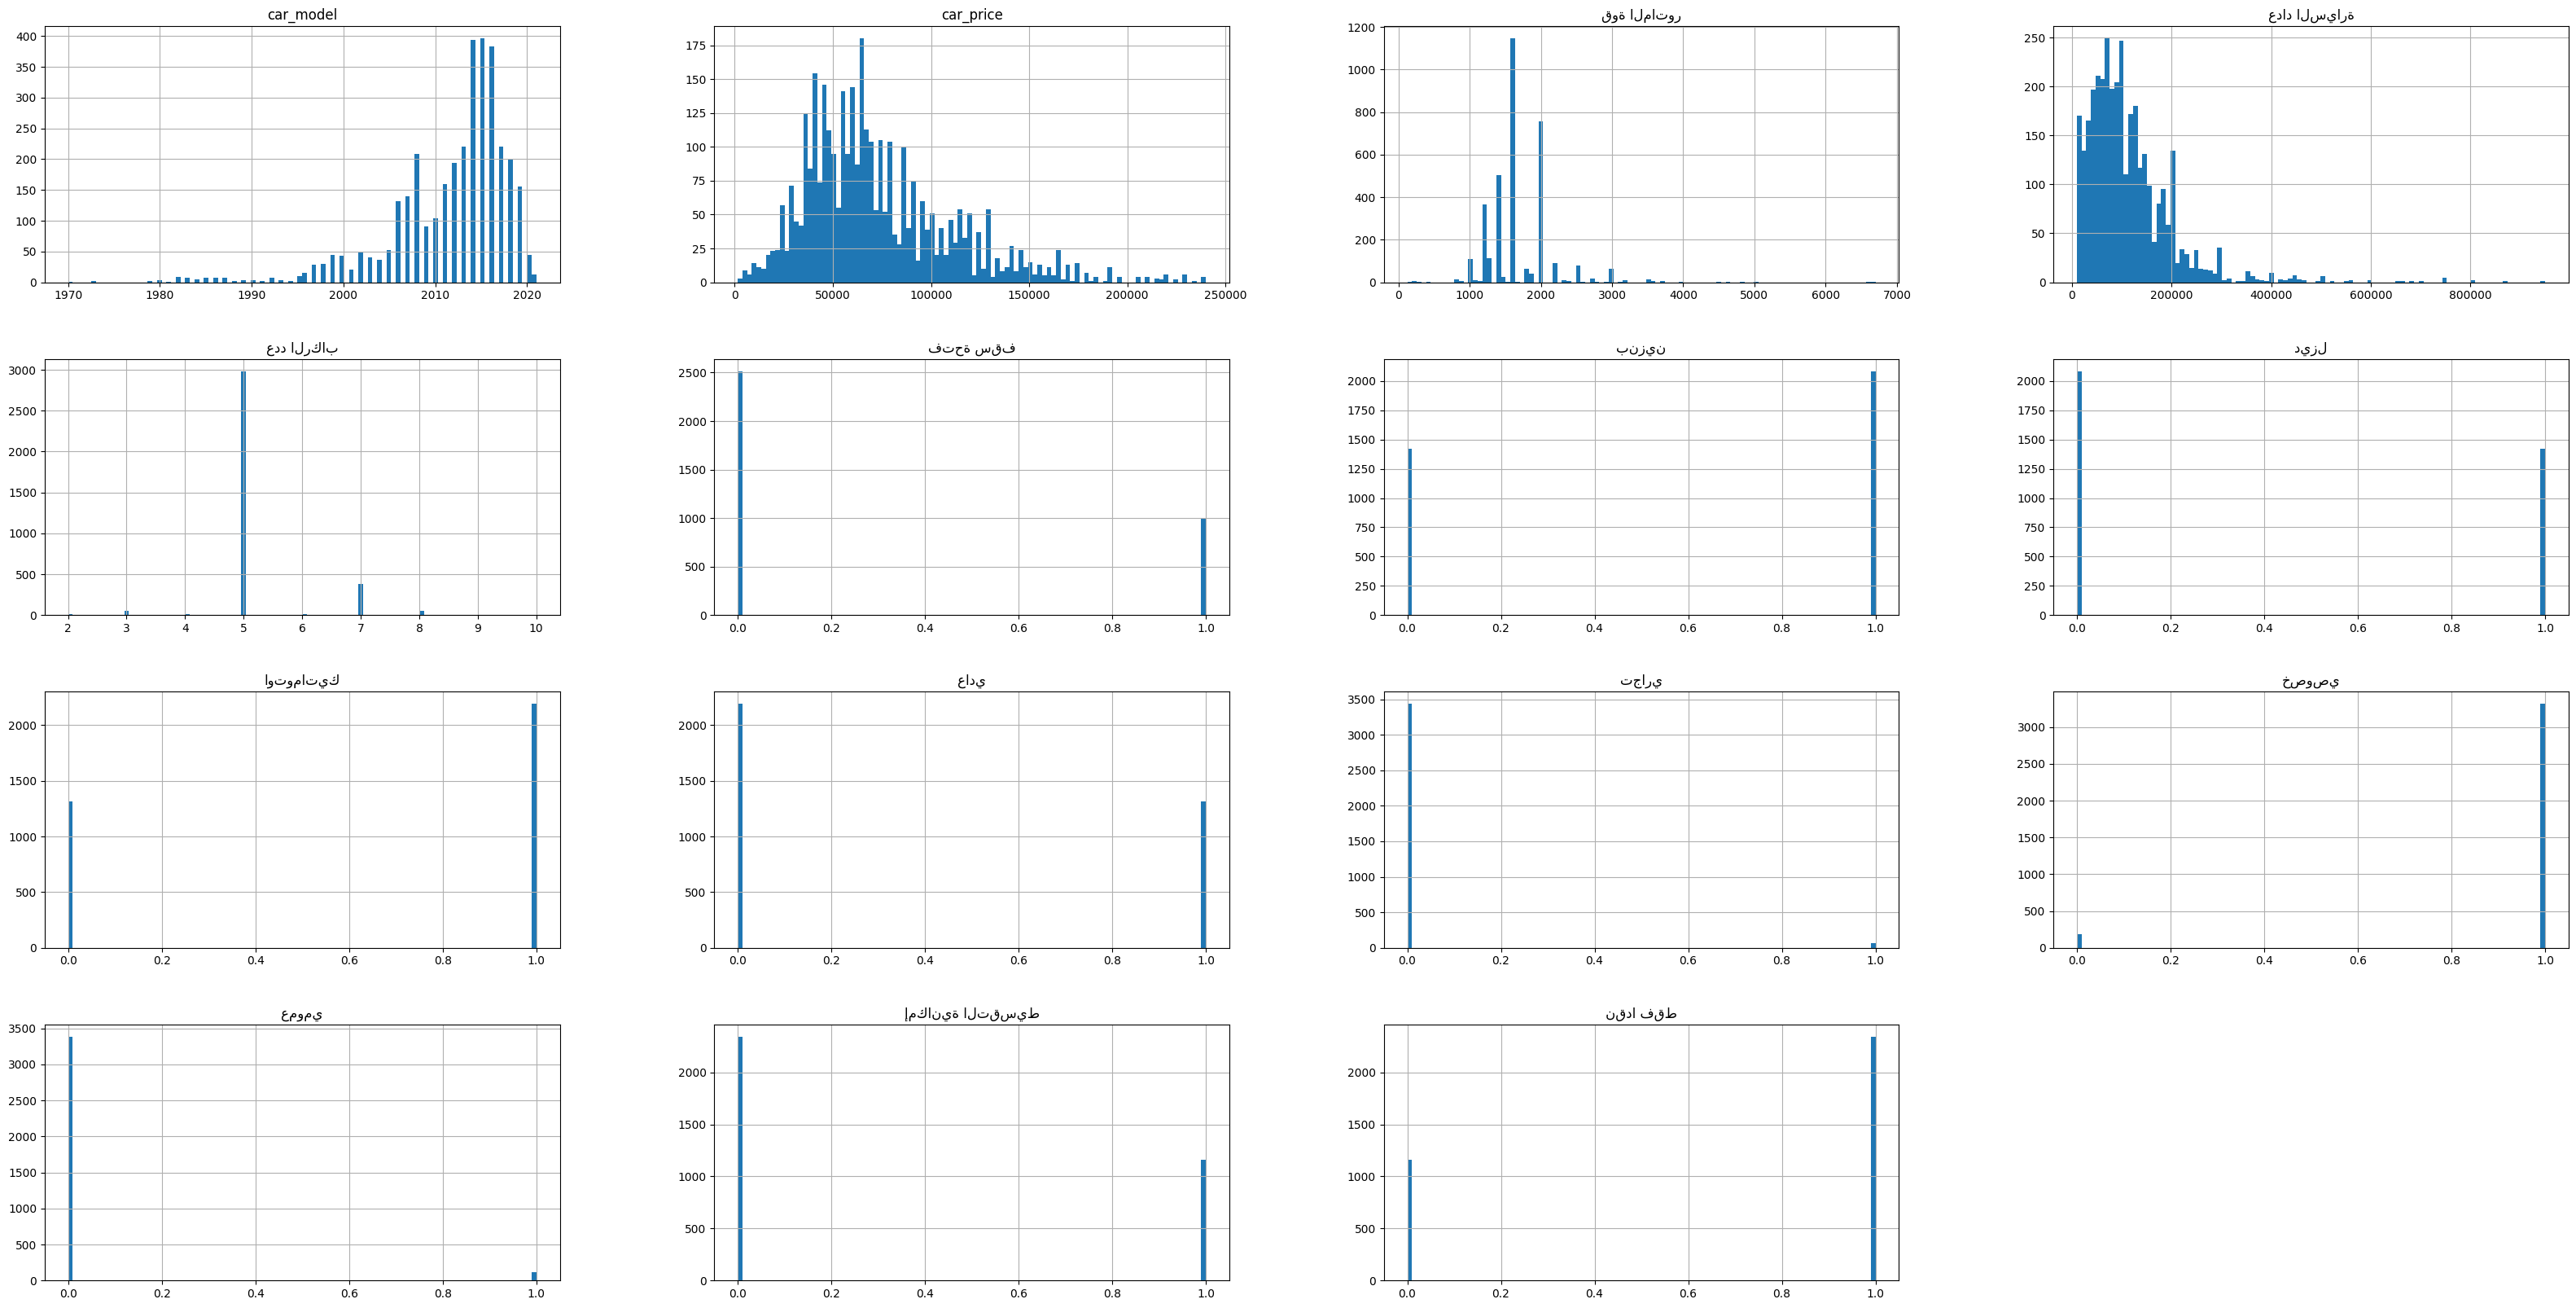

In [167]:
df.hist(bins=100,figsize=(40,20))
plt.show()

In [168]:
# Assuming 'Brand' and 'Model' are columns in your DataFrame
df['Brand_Model'] = df['Brands'] + '_' + df['car_name']

# Label Encoding
brand_model_le = LabelEncoder()
brand_model_feature_arr = brand_model_le.fit_transform(df['Brand_Model'])

# Reshape the array
brand_model_feature_arr = brand_model_feature_arr.reshape(-1, 1)

# One-Hot Encoding
brand_model_ohe = OneHotEncoder()
brand_model_feature_arr = brand_model_ohe.fit_transform(brand_model_feature_arr).toarray()

# Create DataFrame with One-Hot Encoded Columns
brand_model_feature_labels = [str(cls_label) for cls_label in brand_model_le.classes_]
brand_model_features = pd.DataFrame(brand_model_feature_arr, columns=brand_model_feature_labels)

# Concatenate with the Original DataFrame
df = pd.concat([df, brand_model_features], axis=1)

# Drop the Original Categorical Columns
df = df.drop(['Brands', 'car_name', 'Brand_Model'], axis=1)

In [169]:
df

,car_model,car_price,قوة الماتور,عداد السيارة,عدد الركاب,فتحة سقف,بنزين,ديزل,اوتوماتيك,عادي,...,هونداي_جيتس,هونداي_سانتافيه,هونداي_سنتافيه,هونداي_سوناتا,هونداي_فيرنا,هونداي_فيلوستر,هونداي_فينيو,هونداي_كليك,هونداي_كوبيه,هونداي_كونا
0,2015,125000.0,6700,230000.0,7.0,0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,125000.0,6700,120000.0,5.0,0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2008,125000.0,4000,200000.0,3.0,0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000,45000.0,1518,11000.0,3.0,1,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007,50000.0,3000,280000.0,3.0,0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3498,2020,115000.0,1600,30000.0,5.0,1,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3499,2019,105000.0,1600,39000.0,5.0,0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3500,2019,108000.0,1600,45000.0,5.0,0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3501,2006,40000.0,1600,40000.0,5.0,0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# find the best model 

In [170]:

X=df.drop(columns=["car_price"])
y=df["car_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [171]:

poly_reg = LinearRegression()
poly_reg.fit(X_train, y_train)
print(poly_reg.score(X_train, y_train))


0.828922201790343


In [172]:

knn_reg = KNeighborsRegressor()  
knn_reg.fit(X_train, y_train)
print(knn_reg.score(X_train, y_train))


0.5702195059185539


In [173]:

dt_reg = DecisionTreeRegressor()  
dt_reg.fit(X_train, y_train)
print(dt_reg.score(X_train, y_train))

0.9997270614237275


In [174]:

PR =  LinearRegression()
PR.fit( X,y)

LinearRegression()

In [175]:
pickle.dump(PR,open('./pr.sav',"wb"))

In [176]:
df.to_csv('header.csv')